In [65]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('./data/datos.csv', encoding = "UTF-8")
data.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,clase
0,284.92805,350.67788,-0.00093,322.79277,315.33405,8.39052,347.40954,277.24308,11.12329,372.08923,...,286.79234,172.75314,-6.02986,295.90823,144.13841,-4.17843,305.38755,114.55426,-2.41008,0
1,278.28085,345.40205,-0.00130,318.74006,314.35025,6.34735,346.35429,277.35317,8.47528,371.35733,...,291.32571,172.43149,-7.07840,299.57190,145.29706,-6.46456,307.54150,116.75922,-6.23263,0
2,276.40025,344.67422,-0.00131,317.00817,313.70587,5.75395,344.34662,276.55692,7.94423,366.93927,...,289.30880,173.07098,-7.00137,296.22140,146.44763,-6.53205,303.59922,118.51561,-6.35039,0
3,274.34967,343.92245,-0.00131,317.74627,312.19434,7.38592,345.21930,274.20845,10.34781,368.13793,...,290.49569,170.87830,-5.92087,299.04903,143.51583,-5.19691,307.87086,115.32076,-4.96793,0
4,273.91013,343.22628,-0.00133,320.29775,310.32568,7.56058,349.07755,272.35242,10.71873,373.16762,...,291.84546,169.00737,-5.37861,299.95371,141.54401,-4.62802,307.74208,113.48242,-4.36697,0


Separar train y test

In [3]:
X, y = data.drop(['clase'], axis=1), data['clase']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [9]:
X_train.shape

(10203, 63)

In [20]:
xy_preprocessor = make_pipeline(
    MinMaxScaler(feature_range=(0,1))
)

z_preprocessor = make_pipeline(
    MinMaxScaler(feature_range=(0,1))
)

x_columns = ('x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20')
y_columns = ('y0','y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20')
z_columns = ('z0','z1','z2','z3','z4','z5','z6','z7','z8','z9','z10','z11','z12','z13','z14','z15','z16','z17','z18','z19','z20')

preprocessor = make_column_transformer(
    (xy_preprocessor, x_columns),
    (xy_preprocessor, y_columns),
    (z_preprocessor, z_columns),
    remainder='passthrough'
)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.fit_transform(X_test)

## SGD Classifiers

In [33]:
sgd_clf = SGDClassifier(n_jobs=-1, early_stopping=True, verbose=20)

In [36]:
param_grid = {
    'alpha': [1E-4, 1E-2, 1E-1, 1, 1E1],
    'max_iter': [1000, 10000, 30000]
}

grid_sgd_clf = GridSearchCV(sgd_clf, param_grid)
%time grid_sgd_clf.fit(X_train_prepared, y_train)
grid_sgd_clf.best_params_

e after 6 epochs took 0.13 seconds

Convergence after 6 epochs took 0.12 seconds

Norm: 0.06, NNZs: 63, Bias: -0.765151, T: 44076, Avg. loss: 0.149836
Total training time: 0.13 seconds.
Norm: 0.06, NNZs: 63, Bias: -0.771443, T: 44076, Avg. loss: 0.172984Convergence after 6 epochs took 0.13 seconds
Total training time: 0.13 seconds.

Convergence after 6 epochs took 0.14 seconds
Convergence after 6 epochs took 0.13 seconds
Convergence after 6 epochs took 0.13 seconds
Convergence after 6 epochs took 0.14 seconds
Convergence after 6 epochs took 0.14 seconds
Convergence after 6 epochs took 0.14 seconds
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of  11 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.1s remaining:    0.2s
[Paralle

{'alpha': 0.0001, 'max_iter': 30000}

In [37]:
grid_sgd_clf.best_score_

0.7931035344073936

### Prediction

In [38]:
y_predict = grid_sgd_clf.predict(X_test_prepared)
y_predict

array([2, 2, 7, ..., 4, 4, 4])

### Validation

In [40]:
report_sgd_clf = classification_report(y_test, y_predict)
print("Test Report\n", report_sgd_clf)

Test Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       1.00      0.92      0.96       267
           2       0.98      0.91      0.94       272
           3       0.96      0.91      0.94       234
           4       0.72      1.00      0.83       255
           5       0.97      0.63      0.77       204
           6       0.94      0.89      0.92       228
           7       0.78      0.96      0.86       225
           8       0.50      0.94      0.65       211
           9       1.00      0.08      0.15       216
          10       1.00      1.00      1.00       204

    accuracy                           0.85      2551
   macro avg       0.89      0.84      0.82      2551
weighted avg       0.90      0.85      0.83      2551



## Random Forest

In [60]:
random_forest_clf = RandomForestClassifier(n_jobs=-1)

In [61]:
random_forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(n_jobs=-1)

In [62]:
y_predict_train = random_forest_clf.predict(X_train_prepared)
y_predict_test = random_forest_clf.predict(X_test_prepared)

In [63]:
report_random_forest_clf_train = classification_report(y_train, y_predict_train)
report_random_forest_clf_test = classification_report(y_test, y_predict_test)
print("Test Report for train\n", report_random_forest_clf_train)
print("Test Report for test\n", report_random_forest_clf_test)

Test Report for train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00      1033
           2       1.00      1.00      1.00      1012
           3       1.00      1.00      1.00      1033
           4       1.00      1.00      1.00      1034
           5       1.00      1.00      1.00       942
           6       1.00      1.00      1.00       822
           7       1.00      1.00      1.00       923
           8       1.00      1.00      1.00       904
           9       1.00      1.00      1.00       856
          10       1.00      1.00      1.00       790

    accuracy                           1.00     10203
   macro avg       1.00      1.00      1.00     10203
weighted avg       1.00      1.00      1.00     10203

Test Report for test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      0.99

In [69]:
y_predict_test.shape

(2551,)

In [71]:
y_test

2657    2
2617    2
9101    7
335     0
9224    7
       ..
1468    1
6470    5
5610    4
6476    5
5009    4
Name: clase, Length: 2551, dtype: int64

Text(54.260000000000005, 0.5, 'predicted label')

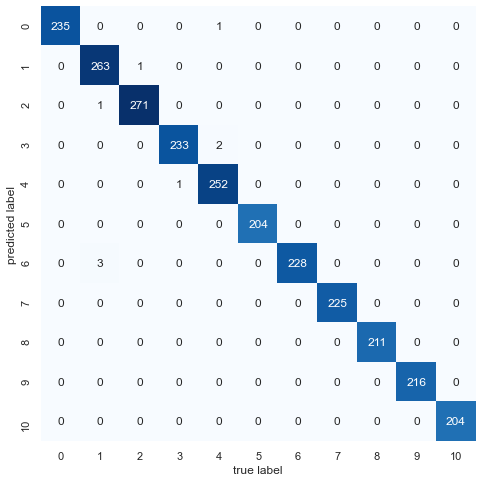

In [74]:
sns.set()
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, y_predict_test)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False, xticklabels=[0,1,2,3,4,5,6,7,8,9,10], yticklabels=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('true label')
plt.ylabel('predicted label')